In [ ]:
##Uday

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
from collections import Counter
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Public\amazon.csv')
df['discounted_price']= df['discounted_price'].str[1:]
df['actual_price']= df['actual_price'].str[1:]
df['discounted_price'] = df['discounted_price'].str.replace(",","")
df['discounted_price'] = df['discounted_price'].astype(float)
df['actual_price'] = df['actual_price'].str.replace(",","")
df['actual_price'] = df['actual_price'].astype(float)

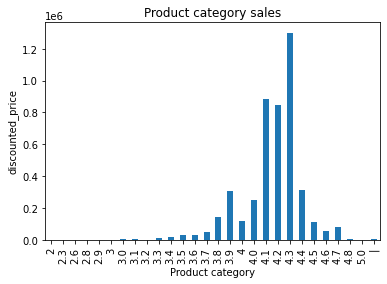

In [27]:
# Bar plot of product categories and their sales
category_sales = df.groupby('rating')['discounted_price'].sum()
category_sales.plot(kind='bar')
plt.xlabel('Product category')
plt.ylabel('discounted_price')
plt.title('Product category sales')
plt.show()

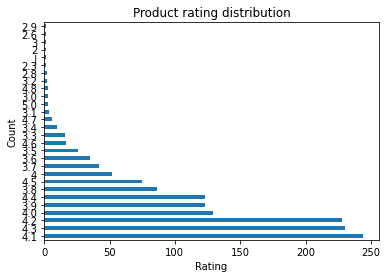

In [30]:
# Bar chart of product ratings and their counts
rating_counts = df['rating'].value_counts()
rating_counts.plot(kind='barh')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Product rating distribution')
plt.show()

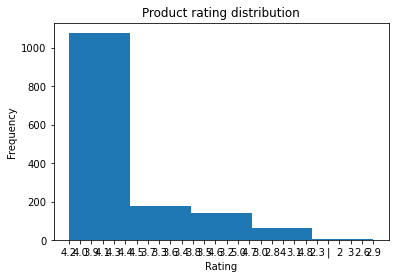

In [32]:
# A histogram of product ratings
plt.hist(df['rating'], bins=5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Product rating distribution')
plt.show()

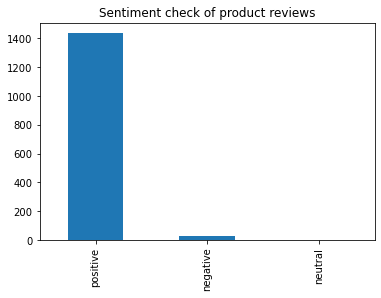

In [62]:
# sentiment analysis on product reviews content
def sentiment_chk(review):
    blob = TextBlob(review)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['review_content'].apply(sentiment_chk)
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment check of product reviews')
plt.show()


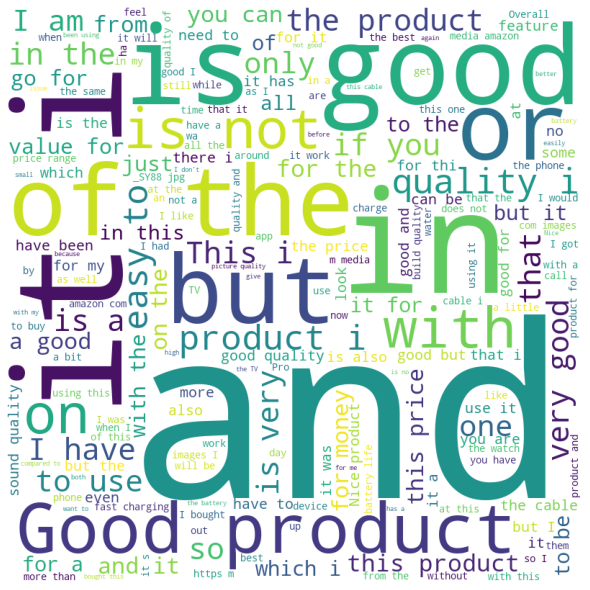

In [39]:
# word cloud of product review content
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=set()).generate(' '.join(df['review_content']))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [40]:
#  TF-IDF scores for product review content
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['review_content'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names())
print(tfidf_df.head())

    00  000  002  003  00product  00shipping   01   02  027inches  02nov2022  \
0  0.0  0.0  0.0  0.0        0.0         0.0  0.0  0.0        0.0        0.0   
1  0.0  0.0  0.0  0.0        0.0         0.0  0.0  0.0        0.0        0.0   
2  0.0  0.0  0.0  0.0        0.0         0.0  0.0  0.0        0.0        0.0   
3  0.0  0.0  0.0  0.0        0.0         0.0  0.0  0.0        0.0        0.0   
4  0.0  0.0  0.0  0.0        0.0         0.0  0.0  0.0        0.0        0.0   

   ...   ವಸ   ಸರ   ಹಣ  𝗔𝗱𝗵𝗲𝘀𝗶𝗼𝗻  𝗕𝘂𝗶𝗹𝗱  𝗤𝘂𝗮𝗹𝗶𝘁𝘆  𝗦𝗼𝗹𝘂𝘁𝗶𝗼𝗻  𝗳𝗼𝗿   𝟱i  𝟱you  
0  ...  0.0  0.0  0.0       0.0    0.0      0.0       0.0  0.0  0.0   0.0  
1  ...  0.0  0.0  0.0       0.0    0.0      0.0       0.0  0.0  0.0   0.0  
2  ...  0.0  0.0  0.0       0.0    0.0      0.0       0.0  0.0  0.0   0.0  
3  ...  0.0  0.0  0.0       0.0    0.0      0.0       0.0  0.0  0.0   0.0  
4  ...  0.0  0.0  0.0       0.0    0.0      0.0       0.0  0.0  0.0   0.0  

[5 rows x 14127 columns]


In [42]:
# topic modeling on product reviews content
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(df['review_content'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
lda_model.fit(doc_term_matrix)
for i, topic in enumerate(lda_model.components_):
    print(f'Topic {i}:')
    print([vectorizer.get_feature_names()[j] for j in topic.argsort()[-10:]])

Topic 0:
['as', 'with', 'for', 'in', 'of', 'and', 'is', 'it', 'to', 'the']
Topic 1:
['with', 'in', 'for', 'good', 'it', 'tv', 'to', 'is', 'and', 'the']
Topic 2:
['charging', 'this', 'the', 'for', 'and', 'cable', 'product', 'it', 'is', 'good']
Topic 3:
['of', 'in', 'to', 'this', 'for', 'good', 'it', 'and', 'is', 'the']
Topic 4:
['of', 'this', 'product', 'good', 'for', 'to', 'is', 'and', 'it', 'the']


In [44]:
# Text classification on product reviews content and rating:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df['review_content'], df['rating'], test_size=0.3, random_state=0)
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
classifier = LinearSVC()
classifier.fit(X_train_tfidf, y_train)
y_pred = classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Check: {accuracy}')

Accuracy: 0.3795454545454545


In [56]:
# Named entity recognition of reviews content
def named_entity(text):
    chunked = ne_chunk(pos_tag(word_tokenize(text)))
    entities = []
    for chunk in chunked:
        if hasattr(chunk, 'label') and chunk.label() == 'NE':
            entities.append(' '.join(c[0] for c in chunk))
    return entities

entities = []
for text in df['review_content']:
    entities += named_entity(text)
entity_counts = Counter(entities)
for entity, count in entity_counts.most_common(1):
    print(entity, count)

In [55]:
# the length of product reviews content
df['review_length'] = df['review_content'].apply(len)
chk_review_length = df['review_length'].mean()
print(f'The Average Review Content Length: {chk_review_length}')

The Average Review Content Length: 1394.1378839590443
